In [246]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings 
warnings.filterwarnings("ignore")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-modelling/Churn_Modelling.csv


In [247]:
df = pd.read_csv("/kaggle/input/churn-modelling/Churn_Modelling.csv", index_col = "RowNumber")

In [248]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [249]:
df.shape

(10000, 13)

In [250]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [251]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [252]:
df.Gender.unique()


array(['Female', 'Male'], dtype=object)

In [253]:
df.Tenure.unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [254]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [256]:
df.drop(["CustomerId","Surname"], axis = 1, inplace = True)

In [257]:
import seaborn as sns
import matplotlib.pyplot as plt

In [258]:
#Numerical Variables
num_var = [f for f in df.columns if df[f].dtype!='O']
num_var


['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [259]:
#Discrete variables 
dis_var = [f for f in num_var if df[f].nunique() < 20]
dis_var

['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']

In [260]:
df.Tenure.nunique()

11

In [261]:
#Continous variable
cont_var = [f for f in num_var if f not in dis_var]
cont_var

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [262]:
#Categorical Variables
cat_var = [f for f in df.columns if f not in num_var]
cat_var


['Geography', 'Gender']

# EDA

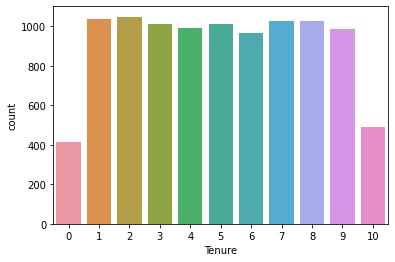

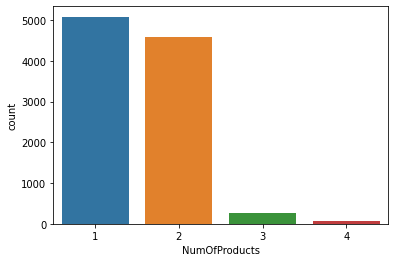

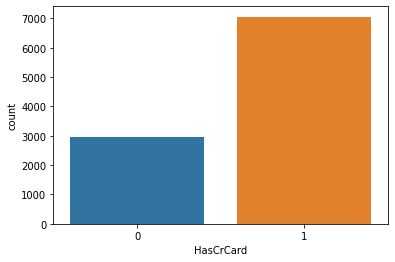

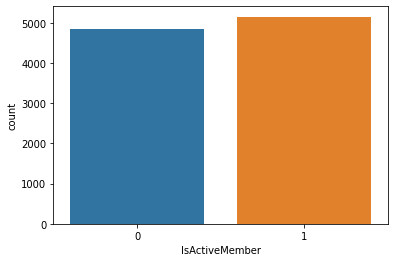

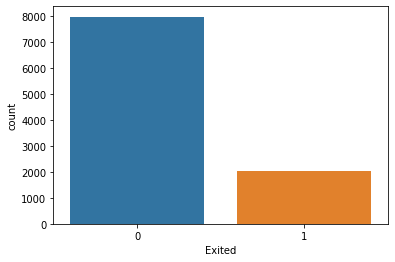

In [263]:
for var in dis_var:
    sns.countplot(df[var])
    plt.show()

Inference : The Dataset is imbalanced (Exited column)


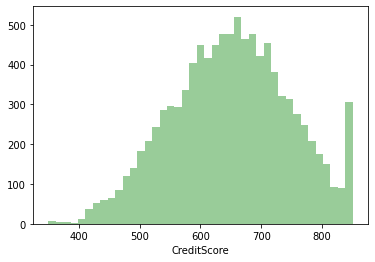

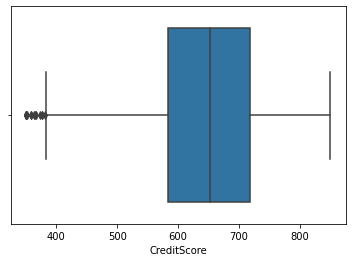

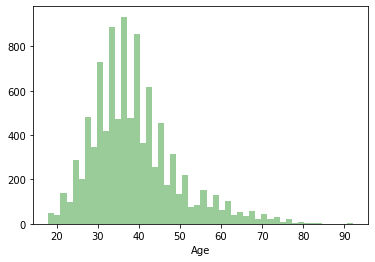

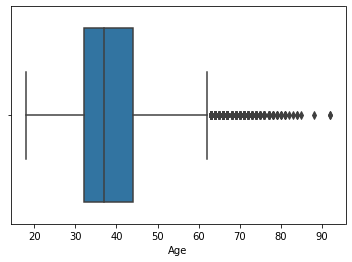

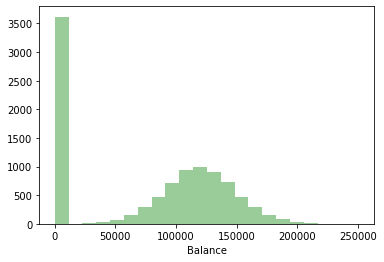

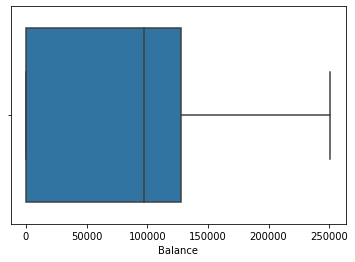

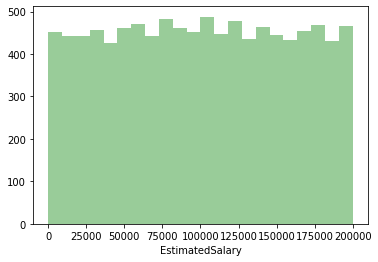

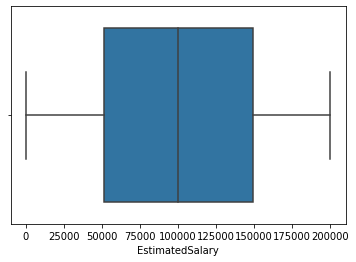

In [264]:
for var in cont_var:
    sns.distplot(df[var], kde = False, color = "green")
    plt.show()
    sns.boxplot(df[var])
    plt.show()

Inference : 

The data does not follow any distribution (Need to convert to gaussian)

There are outliers in CreditScore and Age columns

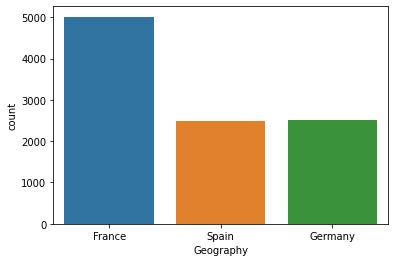

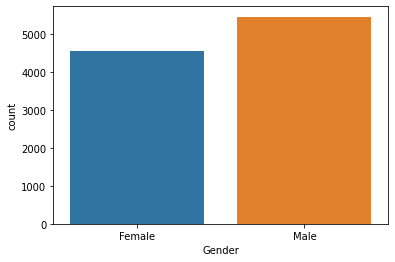

In [265]:
for var in cat_var:
    sns.countplot(df[var])
    plt.show()

<AxesSubplot:>

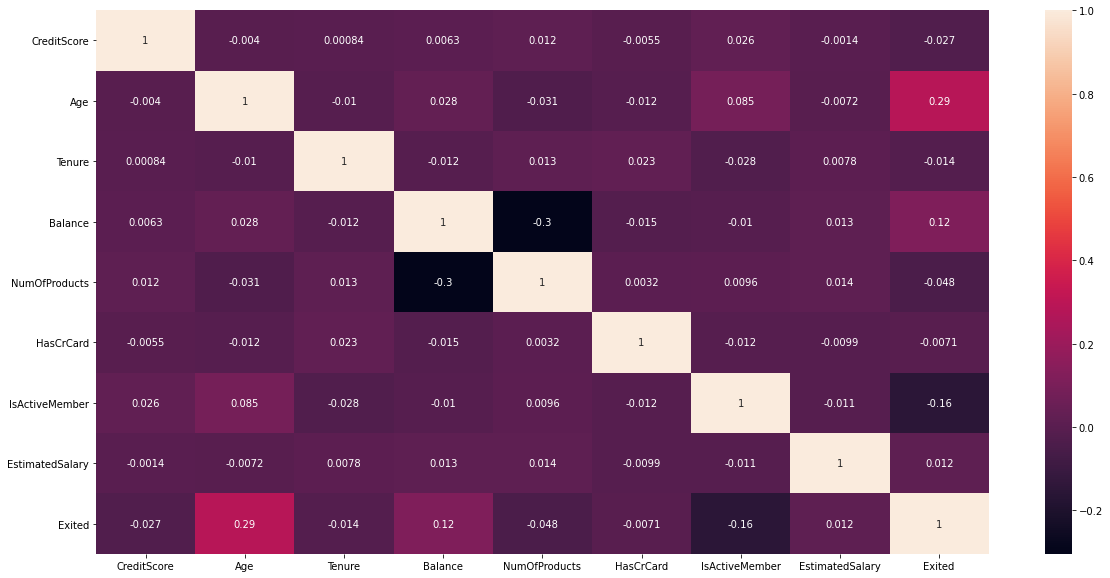

In [266]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot =True)

The target variable(exited) is 
positively correlated with - Age, Balance,Estimated Salary   (Weak)

Negatively with - CreditScore,Tenure,NumofProducts,CreditCard,IsActiveMember

<Figure size 1440x720 with 0 Axes>

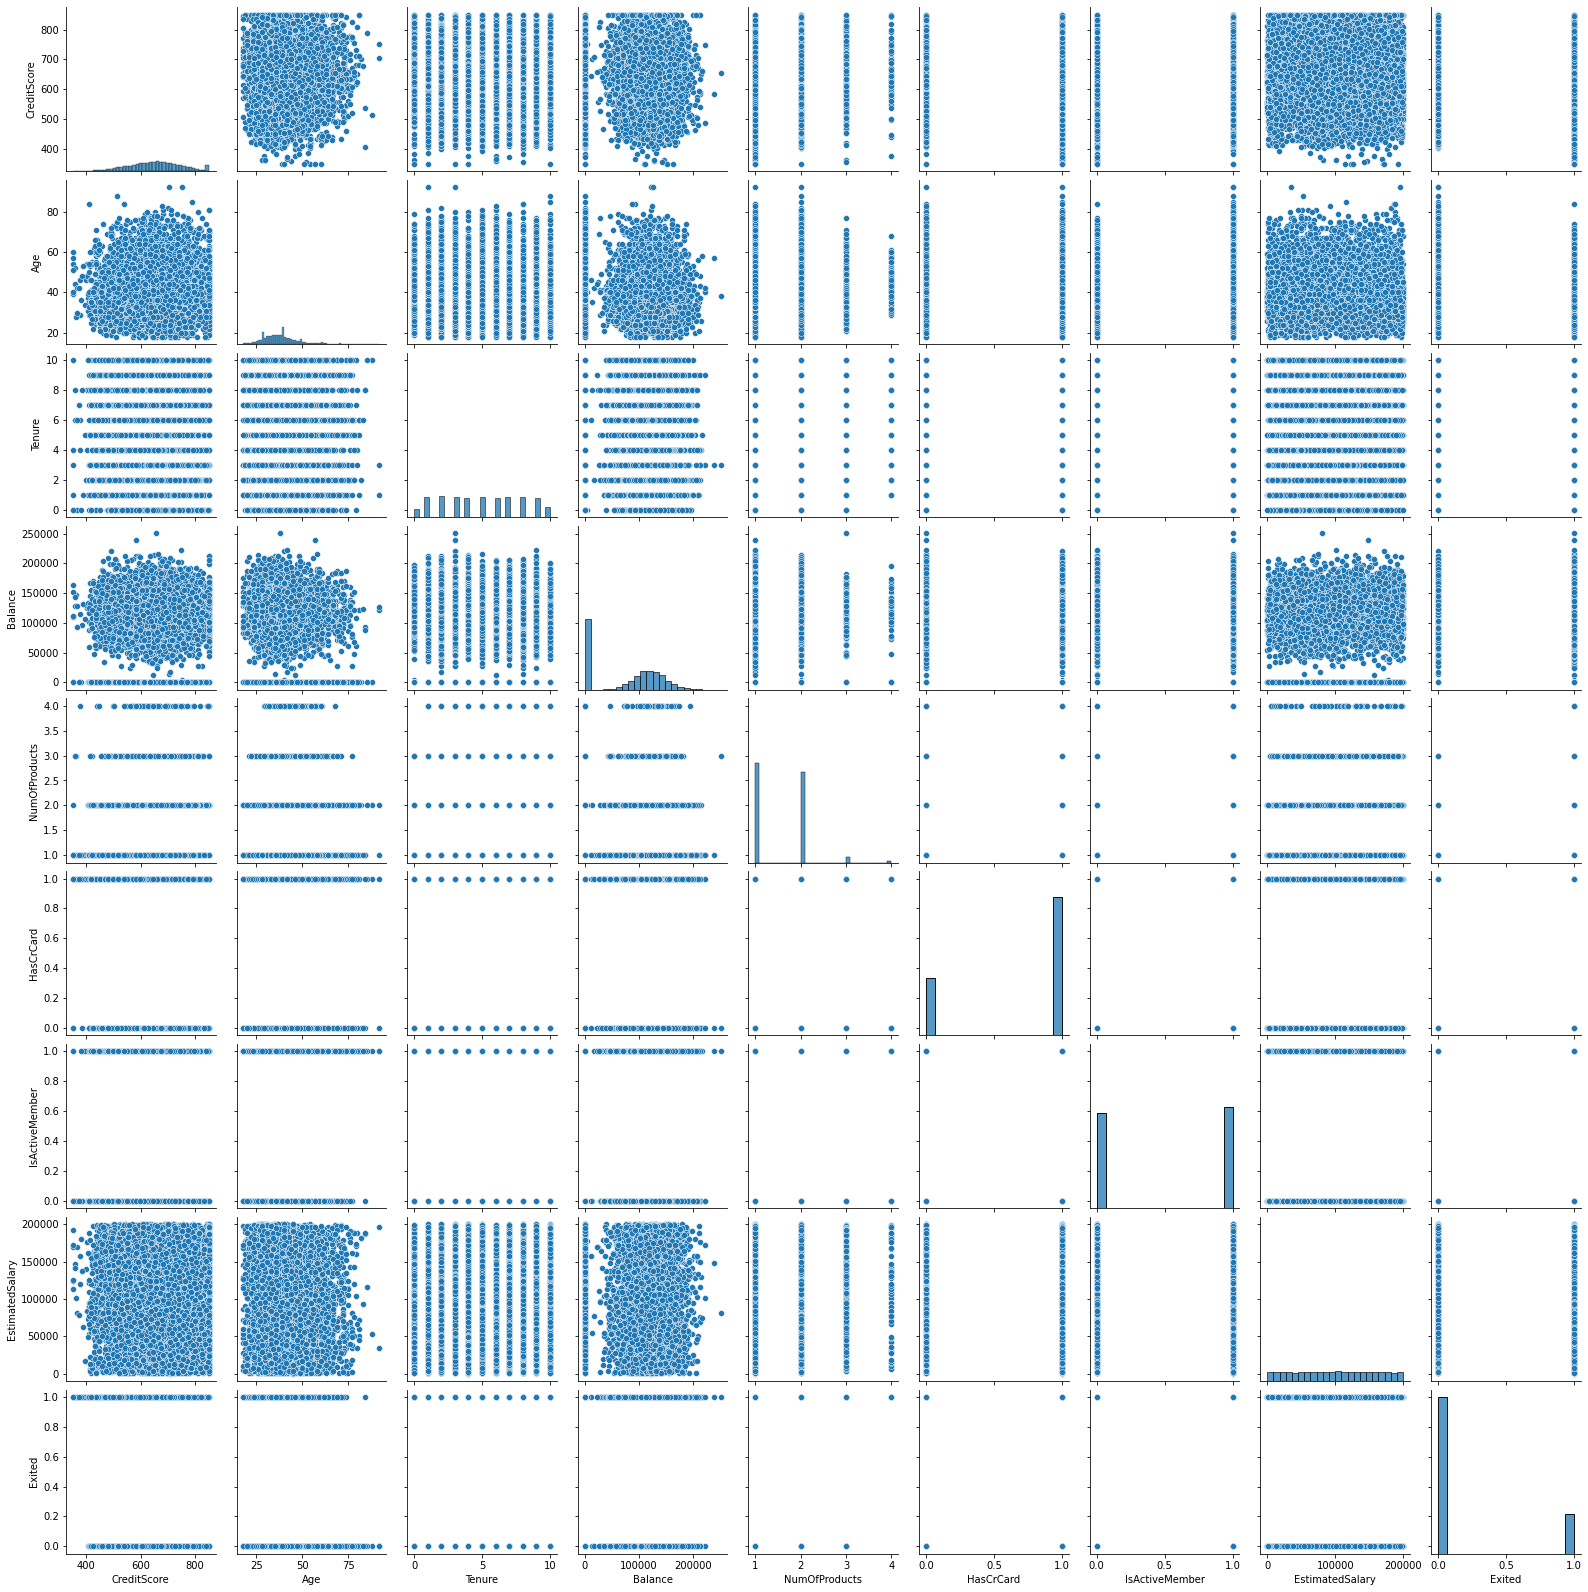

In [267]:
plt.figure(figsize = (20,10))
sns.pairplot(df)

# Handling Imbalanced Dataset 

In [268]:
exited_yes = df[df["Exited"]==1]
exited_no = df[df["Exited"]==0]

In [269]:
print(exited_yes.shape,exited_no.shape)

(2037, 11) (7963, 11)


In [270]:
x = df.drop(["Exited"], axis = 1)
y = df["Exited"]

In [271]:
x.head()
y.head()

RowNumber
1    1
2    0
3    1
4    0
5    0
Name: Exited, dtype: int64

In [272]:
cat_1 = pd.get_dummies(df["Geography"], drop_first = True)
cat_2 = pd.get_dummies(df["Gender"], drop_first = True)

In [273]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
3,502,France,Female,42,8,159660.80,3,1,0,113931.57
4,699,France,Female,39,1,0.00,2,0,0,93826.63
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [274]:
x_t = pd.concat([x,cat_1],axis=1)
x_t_f = pd.concat([x_t,cat_2],axis = 1)
x_t_f.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
RowNumber,,,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [275]:
x_t_f = x_t_f.drop(["Geography","Gender"],axis =1)

In [276]:
x_t_f.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
RowNumber,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,0,0,0
2,608,41,1,83807.86,1,0,1,112542.58,0,1,0
3,502,42,8,159660.80,3,1,0,113931.57,0,0,0
4,699,39,1,0.00,2,0,0,93826.63,0,0,0
5,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [277]:
y.head()

RowNumber
1    1
2    0
3    1
4    0
5    0
Name: Exited, dtype: int64

In [278]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
x_res, y_res = oversample.fit_resample(x_t_f, y)

In [279]:
print(x_res.shape,y_res.shape)

(15926, 11) (15926,)


# Scaling the features

In [280]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [281]:
x_res = scalar.fit_transform(x_res)

In [282]:
from sklearn.model_selection import train_test_split

In [283]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size = 0.25)

# Model Selection and HyperParamter Tuning

In [288]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [291]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
classifier = XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[21:12:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [293]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [295]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
clf1 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=8,
              min_child_weight=3, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [296]:
clf1.fit(x_train,y_train)
print(clf1.score(x_test,y_test))


[21:14:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.866147664490206
